In [53]:
import glob
import os
import numpy

pathslist = glob.glob("/m100_work/INF20_virgo_1/ilarosa0/data/LH/*")
pathslist = numpy.sort(numpy.array(pathslist))
fileslist = pathslist

time_per_iter = 5.5

sizeslist = numpy.loadtxt('/m100/home/userexternal/ilarosa0/gridsizes.txt')

ndetectors = 2
nfiles = sizeslist.size
jobtime = 11 #ore per detector (2 detectors)
totjobtimeH = jobtime*ndetectors
jobtime = jobtime*3600


In [54]:
totjobs = 0
tottime = 0
#nfiles = 1
for i in numpy.arange(nfiles):
    #i indice del file
    fileslist[i] = pathslist[i][49:-4]
    #print(fileslist[i])
    npoints = sizeslist[i]
    time_per_file = time_per_iter*npoints
    
    njobs = numpy.floor(time_per_file/jobtime).astype(int)

    pointsPerJob = numpy.floor(npoints/njobs).astype(int)
    pointsLeft = numpy.int(npoints-pointsPerJob*njobs)
    
    totjobs = totjobs+njobs
    tottime = tottime + 5.5*pointsPerJob*njobs*2 + 5.5*pointsLeft*2
    #print(njobs, pointsPerJob, pointsLeft, totpoints, npoints)
    
print(totjobs)
print(tottime/3600)

5181
116169.70138888889


In [ ]:
    for j in numpy.arange(njobs):
        job_id = j

        with open('/m100/home/userexternal/ilarosa0/scriptsub.sh', 'w') as f:
            print(
"#!/bin/bash\n\
#SBATCH -A INF20_virgo_1\n\
#SBATCH -p m100_usr_prod\n\
#SBATCH --error=/m100/home/userexternal/ilarosa0/jobfeedbacks/myJob" + fileslist[i] + str(job_id) + ".err\n\
#SBATCH --output=/m100/home/userexternal/ilarosa0/jobfeedbacks/myJob" + fileslist[i] + str(job_id) + ".out\n\
#SBATCH --time 0" + str(totjobtimeH) + ":10:00\n\
#SBATCH -N 1\n\
#SBATCH --ntasks-per-node=1\n\
#SBATCH --gres=gpu:1\n\
#SBATCH --job-name=my_batch_job" + fileslist[i] + str(job_id) + "\n\
#SBATCH --mail-type=ALL\n\
#SBATCH --mail-user=iuri.larosa@roma1.infn.it\n\n\
srun python3 /m100/home/userexternal/ilarosa0/thesis/codici/CompleteHough2p0/main.py --job-id " + str(job_id) + " --filename " + fileslist[i] + " --detector LL --points " + str(pointsPerJob) + "\n\
srun python3 /m100/home/userexternal/ilarosa0/thesis/codici/CompleteHough2p0/main.py --job-id " + str(job_id) + " --filename " + fileslist[i] + " --detector LH --points " + str(pointsPerJob), file = f)

        os.system('sbatch scriptsub.sh')
    
    job_id = job_id+1

    with open('/m100/home/userexternal/ilarosa0/scriptsub.sh', 'w') as f:
        print(
"#!/bin/bash\n\
#SBATCH -A INF20_virgo_1\n\
#SBATCH -p m100_usr_prod\n\
#SBATCH --error=/m100/home/userexternal/ilarosa0/jobfeedbacks/myJob" + fileslist[i] + str(job_id) + ".err\n\
#SBATCH --output=/m100/home/userexternal/ilarosa0/jobfeedbacks/myJob" + fileslist[i] + str(job_id) + ".out\n\
#SBATCH --time 0" + str(totjobtimeH) + ":10:00\n\
#SBATCH -N 1\n\
#SBATCH --ntasks-per-node=1\n\
#SBATCH --gres=gpu:1\n\
#SBATCH --job-name=my_batch_job" + fileslist[i] + str(job_id) + "\n\
#SBATCH --mail-type=ALL\n\
#SBATCH --mail-user=iuri.larosa@roma1.infn.it\n\n\
srun python3 /m100/home/userexternal/ilarosa0/thesis/codici/CompleteHough2p0/main.py --job-id " + str(job_id) + " --filename " + fileslist[i] + " --detector LL --points " + str(pointsLeft) + "\n\
srun python3 /m100/home/userexternal/ilarosa0/thesis/codici/CompleteHough2p0/main.py --job-id " + str(job_id) + " --filename " + fileslist[i] + " --detector LH --points " + str(pointsLeft), file = f)

    os.system('sbatch scriptsub.sh') 

2

In [2]:
#-----------
# MAIN CODE |
#-----------
import time
START = time.time()
import numpy
import scipy.io
from PAR import parDefs
from NoiseAdapt import compute_weights
from Inputs import loadData
from GridGen import make_skygrid
import os

#----------------
# Job definition | 
# ---------------
#for the moment working on only one file
job_id = 0
detector = 'LL'
filename = '_04_1023_'
run = "O3"

#pathin = "/home/iuri.larosa/master/inputs/ifil/"
#pathout = "/home/iuri.larosa/master/outputs/"

folderin = "/m100_work/INF20_virgo_1/ilarosa0/data/" + detector + "/"
folderscience = "/m100/home/userexternal/ilarosa0/inputs/"


folderout = "/m100/home/userexternal/ilarosa0/outputs/in_" + run + detector + filename + "/"
os.system('mkdir ' + folderout)
pathout = folderout + "out_" + str(job_id)

dataPath = folderin + "in_" + run + detector + filename + ".mat"
sciencePath = folderscience + run + "_" + detector + "_C01_segments_science_withCAT1veto.txt"

pointsPerJob = 2
points = numpy.arange(job_id*pointsPerJob, job_id*pointsPerJob+pointsPerJob)
print(points.shape)

#---------------------------
# Data loading and managing |
#---------------------------
struct = scipy.io.loadmat(dataPath)['job_pack_0']
PAR = parDefs(struct)

# manage data
[firstFreq, peakmap, spindowns, velocities, indices] = loadData(struct, PAR)

# sky grid generation
[eclCoord, rectCoord, eqCoord] = make_skygrid(PAR)


(2,)
10.99041975308642  mesi
spindown prefix 321 1
spindown fixati  322 1.034280785650578e-09


In [7]:
print(eclCoord.shape[0])

80938


['_04_1023_' '_04_1028_' '_04_1033_' '_04_1038_' '_04_1043_' '_04_1048_'
 '_04_1053_' '_04_1058_' '_04_1063_' '_04_1068_' '_04_1073_' '_04_1078_'
 '_04_1083_' '_04_1088_' '_04_1093_' '_04_1098_' '_04_1103_' '_04_1108_'
 '_04_1113_' '_04_1118_' '_04_1123_' '_04_1128_' '_04_1133_' '_04_1138_'
 '_04_1143_' '_04_1148_' '_04_1153_' '_04_1158_' '_04_1163_' '_04_1168_'
 '_04_1173_' '_04_1178_' '_04_1183_' '_04_1188_' '_04_1193_' '_04_1198_'
 '_04_1203_' '_04_1208_' '_04_1213_' '_04_1218_' '_04_1223_' '_04_1228_'
 '_04_1233_' '_04_1238_' '_04_1243_' '_04_1248_' '_04_1253_' '_04_1258_'
 '_04_1263_' '_04_1268_' '_04_1273_' '_04_1278_' '_04_1283_' '_04_1288_'
 '_04_1293_' '_04_1298_' '_04_1303_' '_04_1308_' '_04_1313_' '_04_1318_'
 '_04_1323_' '_04_1328_' '_04_1333_' '_04_1338_' '_04_1343_' '_04_1348_'
 '_04_1353_' '_04_1358_' '_04_1363_' '_04_1368_' '_04_1373_' '_04_1378_'
 '_04_1383_' '_04_1388_' '_04_1393_' '_04_1398_' '_04_1403_' '_04_1408_'
 '_04_1413_' '_04_1418_' '_04_1423_' '_04_1428_' '_

In [50]:
import glob
import os
pathslist = glob.glob("/m100_work/INF20_virgo_1/ilarosa0/data/LH/*")
pathslist = numpy.sort(numpy.array(pathslist))
fileslist = pathslist
for i in numpy.arange(pathslist.size):
    fileslist[i] = pathslist[i][49:-4]

i = 0
j = 2
job_id = j + (j*i)

with open('/m100/home/userexternal/ilarosa0/scriptsub.sh', 'w') as f:
    print(
"#!/bin/bash\n\
#SBATCH -A INF20_virgo_1\n\
#SBATCH -p m100_usr_prod\n\
#SBATCH --error=/m100/home/userexternal/ilarosa0/jobfeedbacks/myJob_" + str(job_id) + ".err\n\
#SBATCH --output=/m100/home/userexternal/ilarosa0/jobfeedbacks/myJob_" + str(job_id) + ".out\n\
#SBATCH --time 02:10:00\n\
#SBATCH -N 62\n\
#SBATCH --ntasks-per-node=1\n\
#SBATCH --gres=gpu:1\n\
#SBATCH --job-name=my_batch_job_" + str(job_id) + "\n\
#SBATCH --mail-type=ALL\n\
#SBATCH --mail-user=iuri.larosa@roma1.infn.it\n\n\
srun python3 /m100/home/userexternal/ilarosa0/thesis/codici/CompleteHough2p0/main.py --job-id " + str(job_id) + " --filename " + fileslist[i] + "--detector LL\n\
srun python3 /m100/home/userexternal/ilarosa0/thesis/codici/CompleteHough2p0/main.py --job-id " + str(job_id) + " --filename " + fileslist[i] + "--detector LH", file = f)
    
os.system('sbatch scriptsub')    

256

In [1]:
punti50 = 50
tempo50 = 5*60+40

punti30 = 30
tempo30 = ((3*60+24)+(3*60+33))/2

print(tempo30,tempo50)

208.5 340


In [18]:
tempo50/punti50

6.8

In [19]:
tempo30/punti30

6.95

In [20]:
import numpy
x0 = punti30
x1 = punti50
y0 = tempo30
y1  =tempo50

x = numpy.linspace(0,50,1000)

y= ((x-x0)*(y1-y0)/(x1-x0))+y0


<IPython.core.display.Javascript object>


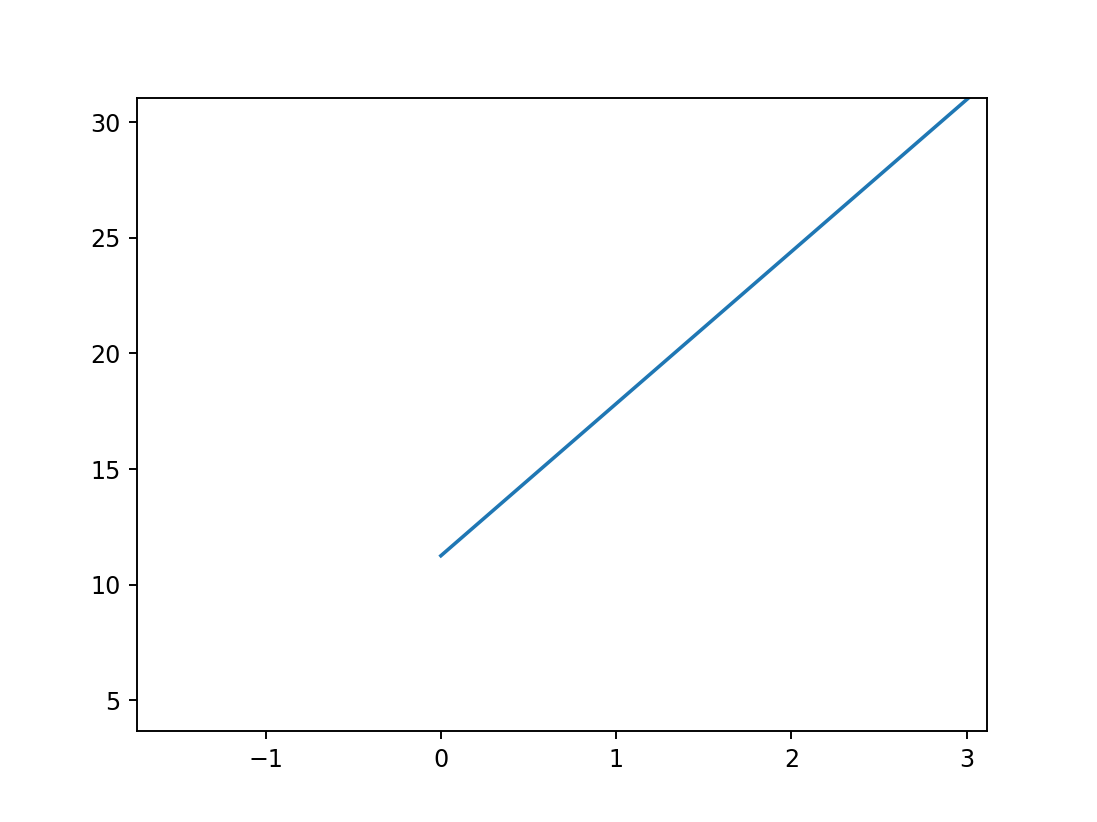

In [21]:
from matplotlib import pyplot
%matplotlib notebook
pyplot.plot(x,y)
pyplot.scatter([x0,x1],[y0,y1])